In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [165]:

def create_data(samples, classes):
    X = np.zeros((samples*classes, 2))
    y = np.zeros(samples*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(samples*class_number, samples*(class_number+1))
        X[ix] = np.c_[np.random.randn(samples)*.1 + (class_number)/3, np.random.randn(samples)*.1 + 0.5]
        y[ix] = class_number
    return X,y

In [166]:
verticaldata = create_data(100, 2)

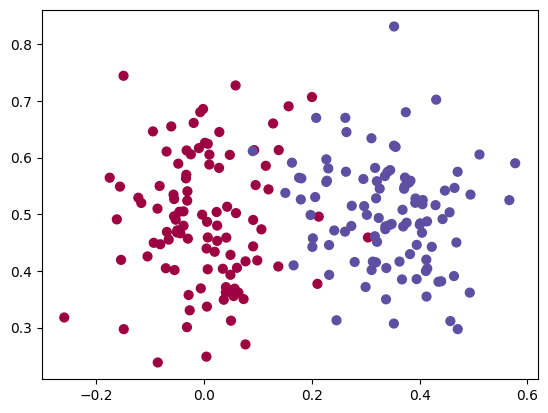

In [167]:
data = np.random.permutation([np.concatenate((verticaldata[0][i],[verticaldata[1][i]]), axis=0).tolist() for i in range(len(verticaldata[0]))])
x = data[:,:2]
y = data[:, 2]
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [68]:
print(x.shape, y.shape)
print(x[0],y[0])

(200, 2) (200,)
[0.08412152 0.40510626] 1.0


In [69]:
def forword(x, w, b):
    return np.dot(x, w) + b

In [70]:
# test
w1 = [[2],[3]]
x1 = [[1,2],[3,4]]
b1 = 1
forword(x1,w1,b1)

array([[ 9],
       [19]])

In [170]:
def binaryCrossEntropyLoss(y, y_pred):
    res = []
    for i in range(len(y)):
        if y[i] == 1:
            res.append(y[i] * np.log((y_pred[i].item() if y_pred[i].item() > 0 else -y_pred[i].item() )))
        elif y[i] == 0:
            res.append((1-y[i]) * np.log(1-y_pred[i].item() if 1-y_pred[i].item() else -1-y_pred[i].item()))
    return -np.mean(res)

In [154]:
def accuracy(y,y_pred):
    if len(y.shape) == 1:
        '''
        y_pred = [
            [0.7, 0.1,0.2],
            [0.1, 0.5, 0.4], 
            [0.02,0.9, 0.08]
        ]
        y = [0,1,1]
        '''
        return np.mean(np.argmax(y_pred, axis=1) == y)
    elif len(y.shape) == 2:
        '''
          ypred = [
            [0.7, 0.1,0.2],
            [0.1, 0.5, 0.4], 
            [0.02,0.9, 0.08]
        ]
        y = [
            [1,0,0],
            [0,1,0],
            [0,1,0]
        ]
        '''
        return np.mean(np.argmax(y_pred, axis=1) == np.argmax(y, axis=1))
    return

In [156]:
def gradient_classification(w, b, x, y, y_pred, lr = 0.01):
    error = y_pred - y
    w = w - (np.sum(x * 2) * error).mean() * lr
    b = b - (error * 2).mean() * lr
    

    return w,b

In [148]:
def getRandomWeight(*r):
    #return np.random.randn(*r)
    return np.zeros(r) + 0.1

In [178]:
def softmax(value):
    value = np.exp(value)
    total = sum(value)
    return list(map(lambda a: a / total, value))

In [188]:
np.exp(0.5) 

1.6487212707001282

In [171]:
w = getRandomWeight(2,1)
b = getRandomWeight(1)
for i in range(100) :
    y_pred = forword(x, w, b)
    #activation
    loss = binaryCrossEntropyLoss(y,y_pred)
    w,b = gradient_classification(w,b,x,y,y_pred)
    print(f"Epoch: {i+1}, Loss: {loss}, Accuracy: {accuracy(y, y_pred)} ")
    

Epoch: 1, Loss: 0.9280264067049027, Accuracy: 0.5 
Epoch: 2, Loss: nan, Accuracy: 0.5 
Epoch: 3, Loss: 0.6829027067358371, Accuracy: 0.5 
Epoch: 4, Loss: 0.49315187203843797, Accuracy: 0.5 
Epoch: 5, Loss: 0.596852838572498, Accuracy: 0.5 
Epoch: 6, Loss: 0.4900870048316993, Accuracy: 0.5 
Epoch: 7, Loss: 0.5582350428242434, Accuracy: 0.5 
Epoch: 8, Loss: 0.4945313259076144, Accuracy: 0.5 
Epoch: 9, Loss: 0.5388320567235712, Accuracy: 0.5 
Epoch: 10, Loss: 0.4997763969518418, Accuracy: 0.5 
Epoch: 11, Loss: 0.5283591973178771, Accuracy: 0.5 
Epoch: 12, Loss: 0.5040760589450656, Accuracy: 0.5 
Epoch: 13, Loss: 0.5224140882971384, Accuracy: 0.5 
Epoch: 14, Loss: 0.5071975810160271, Accuracy: 0.5 
Epoch: 15, Loss: 0.518915754388497, Accuracy: 0.5 
Epoch: 16, Loss: 0.5093372639752612, Accuracy: 0.5 
Epoch: 17, Loss: 0.5168048348008256, Accuracy: 0.5 
Epoch: 18, Loss: 0.5107589207954607, Accuracy: 0.5 
Epoch: 19, Loss: 0.5155090995828351, Accuracy: 0.5 
Epoch: 20, Loss: 0.5116865723389948, 

/tmp/ipykernel_1654/1511174248.py:7: RuntimeWarning: invalid value encountered in log
  res.append((1-y[i]) * np.log(1-y_pred[i].item() if 1-y_pred[i].item() else -1-y_pred[i].item()))


In [177]:
a = -0.7
(a if a > 0 else -a )

0.7